#1.손글씨 인식 모델 만들기


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as tranforms
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
# 손글씨 데이터셋
digis = load_digits()

x_data = digis['data']
y_data = digis['target']

print(x_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


In [4]:
y_data

array([0, 1, 2, ..., 8, 9, 8])

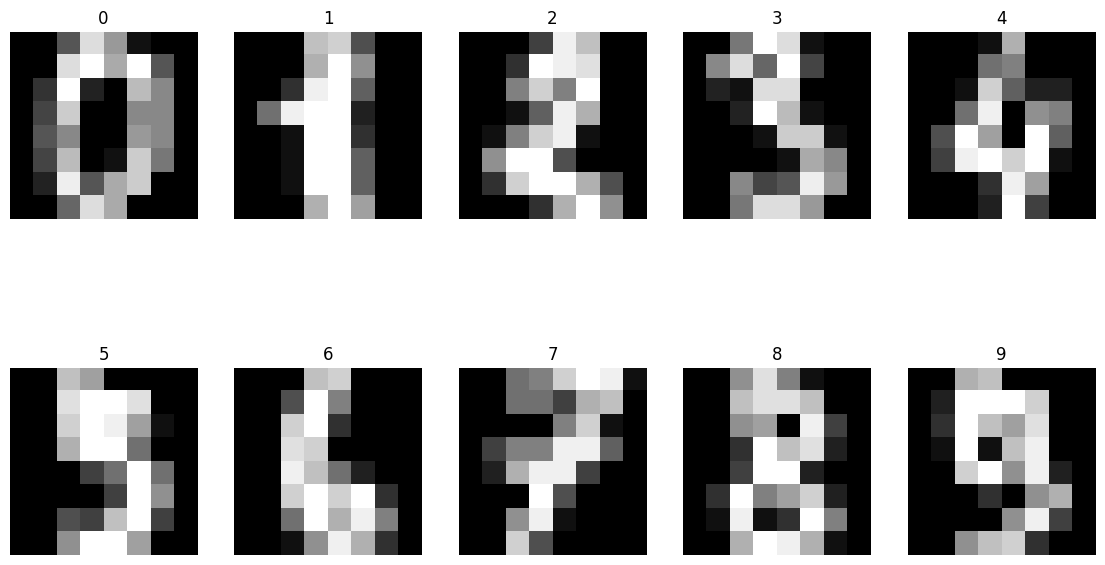

In [5]:
# 시각화 하기  flatten(): 평평한 1차원으로 만들겠다.
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14,8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(x_data[i].reshape((8,8)), cmap='gray')
  ax.set_title(y_data[i])
  ax.axis('off')

In [6]:
x_data = torch.FloatTensor(x_data)
y_data = torch.LongTensor(y_data)

print(x_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [7]:
# 원핫인코딩 y_one_hot = nn.functional.one_hot(y_data, num_classes=3).float()
y_one_hot = nn.functional.one_hot(y_data, num_classes=10).float()
y_one_hot[:10]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_one_hot, test_size=0.2, random_state=10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437, 10])
torch.Size([360, 64]) torch.Size([360, 10])


#2.데이터로더
* 데이터의 양이 많을 때 배치 단위로 학습 하는 방법.
![](https://i.imgur.com/t83RUtL.png)

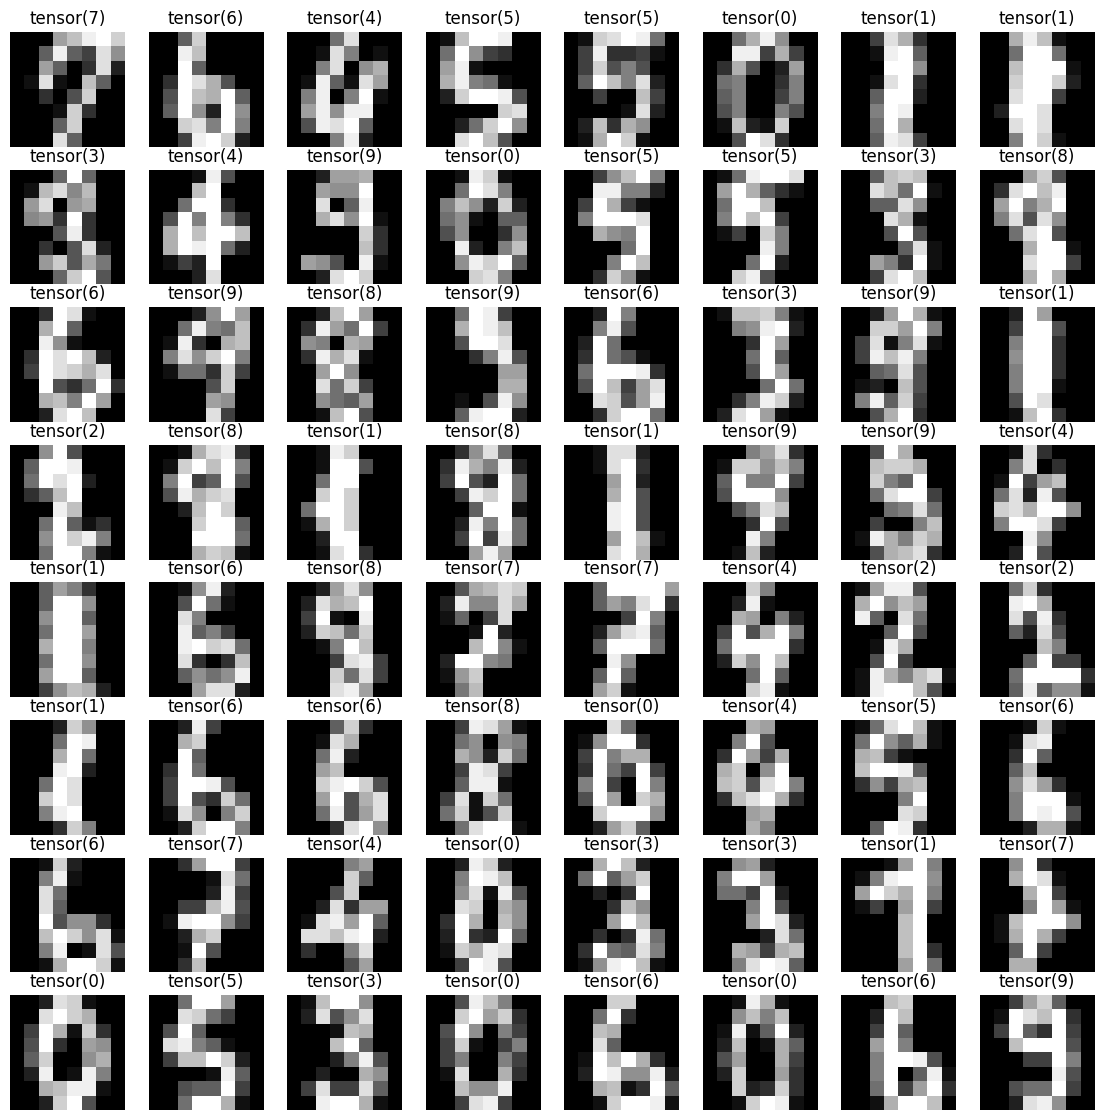

In [10]:
loader = torch.utils.data.DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size=64,
    shuffle=True
)

imgs, labels = next(iter(loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))
for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(torch.argmax(label)))
    ax.axis('off')

In [11]:
# 배치 단위로 학습시키기


model = nn.Sequential(
    nn.Linear(64,10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01) # 아담 사용

epochs = 50

for epoch in range(epochs + 1):
  sum_losses = 0
  sum_accs = 0

  for x_batch, y_batch in loader:

    y_pred = model(x_batch)
    loss = nn.CrossEntropyLoss()(y_pred, y_batch)

    optimizer.zero_grad() #초기화
    loss.backward()
    optimizer.step()

    sum_losses = sum_losses+loss

    # 배치 단위 정확도 저장 하기
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)
    y_batch_index = torch.argmax(y_batch, axis=1)
    acc = (y_batch_index == y_pred_index).float().sum() / len(y_batch) * 100

    sum_accs = sum_accs + acc

  avg_loss = sum_losses / len(loader)
  avg_acc = sum_accs / len(loader)

  print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/50 Loss: 1.620614 Accuracy: 61.97%
Epoch    1/50 Loss: 0.249344 Accuracy: 91.58%
Epoch    2/50 Loss: 0.143463 Accuracy: 96.18%
Epoch    3/50 Loss: 0.114905 Accuracy: 96.73%
Epoch    4/50 Loss: 0.102661 Accuracy: 97.06%
Epoch    5/50 Loss: 0.092272 Accuracy: 97.20%
Epoch    6/50 Loss: 0.083107 Accuracy: 97.88%
Epoch    7/50 Loss: 0.072260 Accuracy: 97.83%
Epoch    8/50 Loss: 0.062274 Accuracy: 98.15%
Epoch    9/50 Loss: 0.060264 Accuracy: 98.30%
Epoch   10/50 Loss: 0.044816 Accuracy: 99.18%
Epoch   11/50 Loss: 0.054291 Accuracy: 98.85%
Epoch   12/50 Loss: 0.051071 Accuracy: 98.56%
Epoch   13/50 Loss: 0.045662 Accuracy: 98.98%
Epoch   14/50 Loss: 0.037953 Accuracy: 99.12%
Epoch   15/50 Loss: 0.036153 Accuracy: 99.25%
Epoch   16/50 Loss: 0.032422 Accuracy: 99.39%
Epoch   17/50 Loss: 0.034598 Accuracy: 99.18%
Epoch   18/50 Loss: 0.029835 Accuracy: 99.52%
Epoch   19/50 Loss: 0.032167 Accuracy: 99.17%
Epoch   20/50 Loss: 0.027554 Accuracy: 99.73%
Epoch   21/50 Loss: 0.030216 Accur

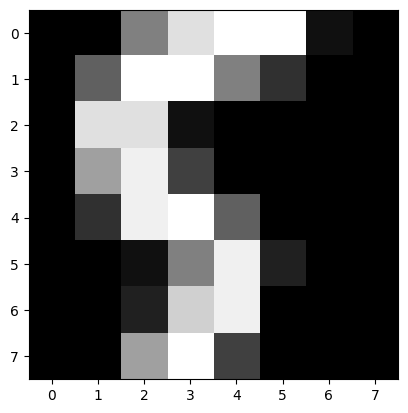

In [12]:
plt.imshow(x_test[0].reshape((8,8)),cmap='gray')

In [13]:
# 각각의 기울기
y_pred = model(x_test)
y_pred[0]

tensor([ 3.6641, -3.1697, -7.2500, -0.3262, -4.7350, 15.8800, -3.0894, -1.9189,
        -0.8351, -4.0229], grad_fn=<SelectBackward0>)

In [14]:
# 확률
y_prob = nn.Softmax(1)(y_pred)
y_prob[0]

tensor([4.9511e-06, 5.3309e-09, 9.0108e-11, 9.1558e-08, 1.1143e-09, 9.9999e-01,
        5.7765e-09, 1.8622e-08, 5.5045e-08, 2.2711e-09],
       grad_fn=<SelectBackward0>)

In [15]:
for i in range(10):
  print(f'숫자{i}일 확률 {y_prob[0][i]:.2f}')

숫자0일 확률 0.00
숫자1일 확률 0.00
숫자2일 확률 0.00
숫자3일 확률 0.00
숫자4일 확률 0.00
숫자5일 확률 1.00
숫자6일 확률 0.00
숫자7일 확률 0.00
숫자8일 확률 0.00
숫자9일 확률 0.00


In [16]:

# 배치 단위 정확도 저장
y_pred_index = torch.argmax(y_prob, axis=1)
y_test_index = torch.argmax(y_test, axis=1)
accuracy = (y_test_index == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy:.2f}%입니다')


테스트 정확도는 95.28%입니다
